In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler

In [2]:
df_test = pd.read_csv('pulsar_data_test.csv')
df_train = pd.read_csv('pulsar_data_train.csv')

In [3]:
df_test.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,116.906250,48.920605,0.186046,-0.129815,3.037625,17.737102,8.122621,78.813405,NaN
1,75.585938,34.386254,2.025498,8.652913,3.765050,21.897049,7.048189,55.878791,NaN
2,103.273438,46.996628,0.504295,0.821088,2.244983,15.622566,9.330498,105.134941,NaN
3,101.078125,48.587487,1.011427,1.151870,81.887960,81.464136,0.485105,-1.117904,NaN
4,113.226562,48.608804,0.291538,0.292120,6.291806,26.585056,4.540138,21.708268,NaN


In [4]:
df_test.shape

(5370, 9)

In [5]:
df_train.sample(6)

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
3924,105.492188,46.654816,0.226223,0.274116,2.503344,14.163846,8.953382,109.947189,0.0
11191,120.203125,46.978279,0.043534,0.019197,2.021739,18.110342,9.834432,102.666605,0.0
11471,123.851562,56.274174,0.286118,-0.480313,1.183946,14.841907,13.769420,200.096846,0.0
11418,134.539062,51.380307,-0.003915,-0.103663,4.546823,23.805026,6.399417,45.246190,0.0
3178,101.695312,49.037383,0.294588,0.032868,2.468227,16.309706,9.111689,NaN,0.0
9585,106.648438,54.690406,0.463555,-0.138092,4.029264,24.610103,6.484957,43.016184,0.0


In [6]:
df_train.shape

(12528, 9)

In [7]:
df_train.target_class.value_counts()

target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                12528 non-null  float64
 1    Standard deviation of the integrated profile  12528 non-null  float64
 2    Excess kurtosis of the integrated profile     10793 non-null  float64
 3    Skewness of the integrated profile            12528 non-null  float64
 4    Mean of the DM-SNR curve                      12528 non-null  float64
 5    Standard deviation of the DM-SNR curve        11350 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           12528 non-null  float64
 7    Skewness of the DM-SNR curve                  11903 non-null  float64
 8   target_class                                   12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5370 entries, 0 to 5369
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                5370 non-null   float64
 1    Standard deviation of the integrated profile  5370 non-null   float64
 2    Excess kurtosis of the integrated profile     4603 non-null   float64
 3    Skewness of the integrated profile            5370 non-null   float64
 4    Mean of the DM-SNR curve                      5370 non-null   float64
 5    Standard deviation of the DM-SNR curve        4846 non-null   float64
 6    Excess kurtosis of the DM-SNR curve           5370 non-null   float64
 7    Skewness of the DM-SNR curve                  5126 non-null   float64
 8   target_class                                   0 non-null      float64
dtypes: float64(9)
memory usage: 377.7 KB


In [10]:
df_test.target_class.value_counts()

Series([], Name: count, dtype: int64)

In [11]:
df=pd.concat([df_train,df_test],ignore_index=True)

In [12]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


### Exploratory Data Analysis (EDA)

In [13]:
df.shape

(17898, 9)

In [14]:
df_train.shape

(12528, 9)

In [15]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [16]:
# remove leading spaces from column names

df.columns=df.columns.str.strip()
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [17]:
# rename column names

df.columns=['Mean','SD','Kurtosis','Skewness','DM_SNR_Mean','DM_SMR_SD','DM-SNR Kurtosis','DM-SNR Skewness','Target_class']
df.columns

Index(['Mean', 'SD', 'Kurtosis', 'Skewness', 'DM_SNR_Mean', 'DM_SMR_SD',
       'DM-SNR Kurtosis', 'DM-SNR Skewness', 'Target_class'],
      dtype='object')

In [18]:
df.sample(6)

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness,Target_class
14384,102.578125,31.502383,0.678838,4.157022,1.983278,NaN,10.930435,136.168421,NaN
8514,114.015625,39.538349,0.259864,0.925969,5.665552,22.255513,4.899519,28.694160,0.0
94,117.289062,43.420393,0.078453,0.533666,1.909699,15.921585,9.654999,105.394685,0.0
1076,117.515625,50.457901,0.307340,0.029155,1.383779,14.785955,11.969439,155.294198,0.0
15341,129.304688,49.965701,0.035296,-0.344218,2.110368,15.982835,10.226565,120.165658,NaN
11870,121.539062,54.580632,0.226732,-0.399871,1.805184,NaN,12.147307,209.716408,0.0


In [19]:
df['Target_class'].value_counts()

Target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

In [20]:
#view summary of Dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean             17898 non-null  float64
 1   SD               17898 non-null  float64
 2   Kurtosis         15396 non-null  float64
 3   Skewness         17898 non-null  float64
 4   DM_SNR_Mean      17898 non-null  float64
 5   DM_SMR_SD        16196 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17029 non-null  float64
 8   Target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [21]:
df.describe()

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness,Target_class
count,17898.000000,17898.000000,15396.000000,17898.000000,17898.000000,16196.000000,17898.000000,17029.000000,12528.000000
mean,111.079968,46.549532,0.480081,1.770279,12.614400,26.373476,8.303556,104.726073,0.092034
std,25.652935,6.843189,1.068333,6.167913,29.472897,19.542821,4.506092,106.612375,0.289085
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.026670,-0.188572,1.923077,14.443905,5.781506,34.776492,0.000000
50%,115.078125,46.947479,0.224414,0.198710,2.801839,18.457026,8.433515,82.768138,0.000000
75%,127.085938,51.023202,0.473488,0.927783,5.464256,28.444832,10.702959,139.163008,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [22]:
#check duplicated in dataset
df.duplicated().sum()

0

In [23]:
#check for misssing values in variable
df.isnull().sum() 

Mean                  0
SD                    0
Kurtosis           2502
Skewness              0
DM_SNR_Mean           0
DM_SMR_SD          1702
DM-SNR Kurtosis       0
DM-SNR Skewness     869
Target_class       5370
dtype: int64

In [24]:
df.shape

(17898, 9)

### Handling missing values

In [25]:
df['DM-SNR Skewness'] = df['DM-SNR Skewness'].fillna(df['DM-SNR Skewness'].mean())

In [26]:
print(df.isnull().sum())

Mean                  0
SD                    0
Kurtosis           2502
Skewness              0
DM_SNR_Mean           0
DM_SMR_SD          1702
DM-SNR Kurtosis       0
DM-SNR Skewness       0
Target_class       5370
dtype: int64


In [27]:
df['DM_SMR_SD'] = df['DM_SMR_SD'].fillna(df['DM_SMR_SD'].mean())

In [28]:
#handling missing values in Target_class column using drop rows
df.dropna(subset=['Target_class'],inplace=True)

In [29]:
df['Kurtosis'] = df['Kurtosis'].fillna(df['Kurtosis'].mean())

In [30]:
print(df.isnull().sum())

Mean               0
SD                 0
Kurtosis           0
Skewness           0
DM_SNR_Mean        0
DM_SMR_SD          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
Target_class       0
dtype: int64


In [31]:
des = df.describe()
des

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness,Target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.353402,8.333489,105.485883,0.092034
std,25.672828,6.801077,0.988230,6.208450,29.613230,18.666011,4.535783,104.686249,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.289934,0.203317,2.792642,19.617161,8.451097,87.795533,0.000000
75%,127.109375,50.979103,0.478548,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [32]:
round(des,2)

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness,Target_class
count,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.35,8.33,105.49,0.09
std,25.67,6.80,0.99,6.21,29.61,18.67,4.54,104.69,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.06,-0.19,1.91,14.76,5.80,38.13,0.00
50%,115.18,46.93,0.29,0.20,2.79,19.62,8.45,87.80,0.00
75%,127.11,50.98,0.48,0.93,5.41,26.47,10.73,135.77,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


In [33]:
df.head()

,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness,Target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,26.373476,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [34]:
df.Target_class.value_counts()

Target_class
0.0    11375
1.0     1153
Name: count, dtype: int64

In [35]:
df.Target_class.value_counts().sum()

12528

In [36]:
df.describe()


,Mean,SD,Kurtosis,Skewness,DM_SNR_Mean,DM_SMR_SD,DM-SNR Kurtosis,DM-SNR Skewness,Target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.478548,1.778431,12.674758,26.353402,8.333489,105.485883,0.092034
std,25.672828,6.801077,0.988230,6.208450,29.613230,18.666011,4.535783,104.686249,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.289934,0.203317,2.792642,19.617161,8.451097,87.795533,0.000000
75%,127.109375,50.979103,0.478548,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Mean             12528 non-null  float64
 1   SD               12528 non-null  float64
 2   Kurtosis         12528 non-null  float64
 3   Skewness         12528 non-null  float64
 4   DM_SNR_Mean      12528 non-null  float64
 5   DM_SMR_SD        12528 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  12528 non-null  float64
 8   Target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 978.8 KB


### Split data
##### Split into Independent/Dependent variables

In [38]:
# Splitting variables
x=df.drop(['Target_class'],axis=1) # independent
y=df['Target_class']                # dependent

In [39]:
x.columns

Index(['Mean', 'SD', 'Kurtosis', 'Skewness', 'DM_SNR_Mean', 'DM_SMR_SD',
       'DM-SNR Kurtosis', 'DM-SNR Skewness'],
      dtype='object')

### Split into Train/Test sets

In [40]:
# Splitting dataset into test/train
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [41]:
# check the shape of X_train and X_test
x_train.shape, x_test.shape

((10022, 8), (2506, 8))

In [42]:
y_train

6494    0.0
8159    0.0
637     0.0
7758    0.0
3734    0.0
       ... 
1854    0.0
5874    0.0
2787    0.0
242     0.0
6364    0.0
Name: Target_class, Length: 10022, dtype: float64

### Feature scaling

#### using standardscaler

In [43]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_train

array([[-6.34830595e-01, -1.21957984e+00,  1.04998650e-01, ...,
         1.47072793e+00, -1.01655974e+00, -8.93609902e-01],
       [ 4.24737349e-01,  1.61582950e-01, -4.54224212e-01, ...,
        -7.82516769e-01,  2.10655618e+00,  2.26467436e+00],
       [ 7.39547499e-01,  7.13588821e-01, -6.45954795e-01, ...,
        -7.06541666e-01,  3.72239856e-01,  3.16318835e-01],
       ...,
       [ 5.72598132e-01,  3.27965209e-01, -2.36731302e-01, ...,
        -8.61785685e-04,  1.82346323e+00,  1.74231554e+00],
       [ 3.01116039e-01, -6.38322701e-01,  3.51887189e-03, ...,
         2.26621636e-01, -5.53573983e-01, -6.78840556e-01],
       [ 2.35063476e-01,  1.13203913e-02, -1.33937356e-01, ...,
        -3.35421266e-01, -4.72999515e-01, -5.64268966e-01]])

In [44]:
x_test = scaler.transform(x_test)
x_test

array([[-2.75548145, -2.20726868,  3.45780621, ...,  2.22497074,
        -1.40401691, -0.00520142],
       [-0.21336677,  0.10883982, -0.14005341, ..., -0.66707852,
         0.63651017,  0.45644723],
       [ 0.08932365, -0.83333771, -0.10532547, ..., -0.17146535,
        -0.19372719, -0.45745286],
       ...,
       [ 1.62307627,  1.40240072, -1.0557741 , ...,  2.88854   ,
        -2.04203596, -0.00520142],
       [ 0.06690214, -0.71038867,  0.31448048, ..., -0.46001415,
         0.31086757,  0.03435217],
       [-2.03344816, -0.84015584,  2.20207308, ...,  1.30350108,
        -1.18892773, -0.93053847]])

### Run SVM

In [45]:
from sklearn.svm import SVC
svc=SVC()

In [46]:
svc.fit(x_train, y_train)

SVC()

In [47]:
y_test

2376     1.0
5232     0.0
6348     0.0
123      0.0
10131    0.0
        ... 
9297     0.0
4423     0.0
5032     0.0
1742     0.0
2816     1.0
Name: Target_class, Length: 2506, dtype: float64

In [48]:
y_pred = svc.predict(x_test)

In [49]:
y_pred

array([1., 0., 0., ..., 0., 0., 1.])

In [50]:
svc.score(x_test, y_test)

0.981245011971269

In [51]:
#svc.predict([-0.71219816, -1.7813034 ,  0.26839561, ..., -0.21302165,
 #       -0.01245055, -0.34215337])

In [52]:
# Fit the SVM model
clf = SVC(kernel='linear', C=1.0)
## fit classifier to training set
clf.fit(x_train, y_train)

SVC(kernel='linear')

###  Predictions

In [53]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

####  Accuracy

In [54]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [55]:
train_accuracy

0.9750548792656156

In [56]:
test_accuracy

0.9804469273743017

### Confusion_Matrix & Classification_Report

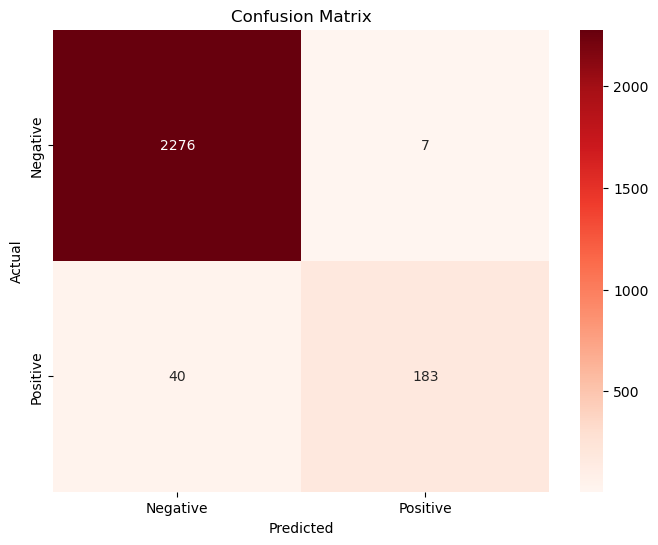

In [57]:
# draw the confusion matrix using heatmap
# Assuming you have true labels y_test and predicted labels y_test_pred
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
# label the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Classification Metrix

In [58]:
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2276    7]
 [  40  183]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2283
         1.0       0.96      0.82      0.89       223

    accuracy                           0.98      2506
   macro avg       0.97      0.91      0.94      2506
weighted avg       0.98      0.98      0.98      2506

